In [2]:
import pandas as pd
import random
import torch
import os
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader
from helper import create_data, create_edges
from model import MNISTRGCN, Trainer
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
mnist_train = pd.read_csv('./data/mnist_train.csv')
len(mnist_train)

60000

In [4]:
#Create dataset using 2000 rows by normalizing the data and creating a PyG Data object for each row
dataset = []
for i in range(2000):
    data = create_data(mnist_train.iloc[i, 1:].values/255.0, mnist_train.iloc[i, 0])
    dataset.append(data)

split_idx = int(len(dataset) * 0.8)
random.shuffle(dataset)

train_dataset = dataset[:split_idx]
val_dataset = dataset[split_idx:]

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) #2000*0.8=1600
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False) #2000*0.2=400

In [5]:
#Check the data
next(iter(train_loader))

DataBatch(x=[4991, 1], edge_index=[2, 16010], y=[32], edge_type=[16010], batch=[4991], ptr=[33])

In [13]:
model = MNISTRGCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.99))
criterion = torch.nn.CrossEntropyLoss()
trainer = Trainer(model, optimizer, criterion)


In [14]:
train_acc = []
val_acc = []
for epoch in range(1, 151):
    trainer.train(train_loader)
    train_acc.append(trainer.test(train_loader))
    val_acc.append(trainer.test(val_loader))
    if epoch % 10 == 0:
        print(f'Epoch {epoch:03d}, Train Acc: {train_acc[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}')

Epoch 010, Train Acc: 0.6544, Val Acc: 0.6325
Epoch 020, Train Acc: 0.7194, Val Acc: 0.6725
Epoch 030, Train Acc: 0.7769, Val Acc: 0.7175
Epoch 040, Train Acc: 0.8037, Val Acc: 0.7100
Epoch 050, Train Acc: 0.8256, Val Acc: 0.7450
Epoch 060, Train Acc: 0.8269, Val Acc: 0.7475
Epoch 070, Train Acc: 0.8387, Val Acc: 0.7625
Epoch 080, Train Acc: 0.8562, Val Acc: 0.7675
Epoch 090, Train Acc: 0.8556, Val Acc: 0.7700
Epoch 100, Train Acc: 0.8781, Val Acc: 0.7900
Epoch 110, Train Acc: 0.8862, Val Acc: 0.7725
Epoch 120, Train Acc: 0.8944, Val Acc: 0.8000
Epoch 130, Train Acc: 0.8744, Val Acc: 0.7800
Epoch 140, Train Acc: 0.8944, Val Acc: 0.7975
Epoch 150, Train Acc: 0.9031, Val Acc: 0.8125


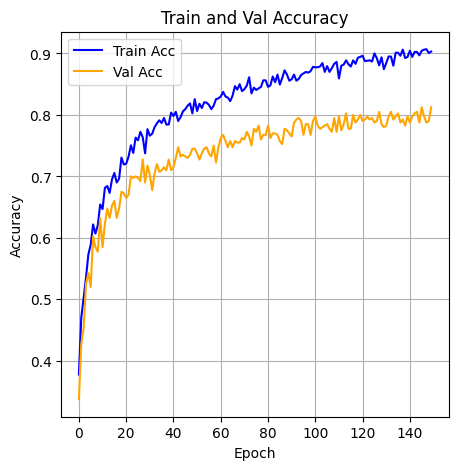

In [15]:
plt.figure(figsize=(5, 5))  
plt.plot(train_acc, label='Train Acc', color='blue')
plt.plot(val_acc, label='Val Acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Check the model's performance on the test set
mnist_test = pd.read_csv('./data/mnist_test.csv')
len(mnist_test)

10000

In [17]:
test_dataset = []
for i in range(len(mnist_test)):
    data = create_data(mnist_test.iloc[i, 1:].values/255.0, mnist_test.iloc[i, 0])
    test_dataset.append(data)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_acc = trainer.test(test_loader)
print(f'Test Acc: {test_acc:.4f}')

Test Acc: 0.8450


Result shows that using only 1600 rows for training, the model still can achieve 84.5% accuracy on the test set with 10000 data points.